In [3]:
!pip install pytorch-lightning

In [2]:
!pip install torchmetrics

In [4]:
!pip install timm

In [5]:
!pip install torchsummary

In [6]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension install --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Config option `kernel_spec_manager_class` not recognized by `InstallNBExtensionApp`.
Installing /opt/conda/lib/python3.10/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Making directory: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/
Copying: /opt/conda/lib/python3.10/site-packages/widgetsnbextension/static/extension.js -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
Copying: /opt/conda/lib/python3.10/site-packages/widgetsnbextension/static/extension.js.map -> /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    


In [7]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import EarlyStopping
import torch
import torchvision.models as models
from torchsummary import summary
import timm
from torchmetrics import Accuracy
import pytorch_lightning as pl
import torch.nn as nn
import torch.nn.functional as F
import torch
from pytorch_lightning.callbacks import ModelCheckpoint

2024-05-28 18:59:59.412311: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 18:59:59.412430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 18:59:59.549606: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
C_folder = '/kaggle/input/img-chordclass-raw/Img/Img/0'
D_folder = '/kaggle/input/img-chordclass-raw/Img/Img/1'
E_folder = '/kaggle/input/img-chordclass-raw/Img/Img/2'
G_folder = '/kaggle/input/img-chordclass-raw/Img/Img/3'
A_folder = '/kaggle/input/img-chordclass-raw/Img/Img/4'
Dm_folder = '/kaggle/input/img-chordclass-raw/Img/Img/5'
Em_folder = '/kaggle/input/img-chordclass-raw/Img/Img/6'
Am_folder = '/kaggle/input/img-chordclass-raw/Img/Img/7'
E_Barre_folder = '/kaggle/input/img-chordclass-raw/Img/Img/8'
A_Barre_folder = '/kaggle/input/img-chordclass-raw/Img/Img/9'
Em_Barre_folder = '/kaggle/input/img-chordclass-raw/Img/Img/10'
Am_Barre_folder = '/kaggle/input/img-chordclass-raw/Img/Img/11'
test_folder = '/kaggle/working/chord/Img_Test'
train_folder = '/kaggle/working/chord/Img_Train'

In [8]:
C_files = [(os.path.join(C_folder, file), 0) for file in os.listdir(C_folder) if file.endswith('.jpg')]
D_files = [(os.path.join(D_folder, file), 1) for file in os.listdir(D_folder) if file.endswith('.jpg')]
E_files = [(os.path.join(E_folder, file), 2) for file in os.listdir(E_folder) if file.endswith('.jpg')]
G_files = [(os.path.join(G_folder, file), 3) for file in os.listdir(G_folder) if file.endswith('.jpg')]
A_files = [(os.path.join(A_folder, file), 4) for file in os.listdir(A_folder) if file.endswith('.jpg')]
Dm_files = [(os.path.join(Dm_folder, file), 5) for file in os.listdir(Dm_folder) if file.endswith('.jpg')]
Em_files = [(os.path.join(Em_folder, file), 6) for file in os.listdir(Em_folder) if file.endswith('.jpg')]
Am_files = [(os.path.join(Am_folder, file), 7) for file in os.listdir(Am_folder) if file.endswith('.jpg')]
E_Barre_files = [(os.path.join(E_Barre_folder, file), 8) for file in os.listdir(E_Barre_folder) if file.endswith('.jpg')]
A_Barre_files = [(os.path.join(A_Barre_folder, file), 9) for file in os.listdir(A_Barre_folder) if file.endswith('.jpg')]
Em_Barre_files = [(os.path.join(Em_Barre_folder, file), 10) for file in os.listdir(Em_Barre_folder) if file.endswith('.jpg')]
Am_Barre_files = [(os.path.join(Am_Barre_folder, file), 11) for file in os.listdir(Am_Barre_folder) if file.endswith('.jpg')]
all_files = C_files + D_files + E_files + G_files + A_files + Dm_files + Em_files + Am_files + E_Barre_files + A_Barre_files + Em_Barre_files + Am_Barre_files

In [8]:
len(all_files)

28720

In [9]:
filenames = [file[0] for file in all_files]
labels = [file[1] for file in all_files]
X_train_filenames, X_test_filenames, y_train, y_test = train_test_split(filenames, labels, test_size=0.2, random_state=42)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(train_folder, exist_ok=True)

In [10]:
for filename, label in zip(X_train_filenames, y_train):
    dst_folder = os.path.join(train_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)
    
for filename, label in zip(X_test_filenames, y_test):
    dst_folder = os.path.join(test_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)

In [11]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.ImageFolder(root=train_folder, transform=transform)
val_dataset = datasets.ImageFolder(root=test_folder, transform=transform)

batch_size = 32
NUM_WORKERS = int(os.cpu_count() / 2)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 12) 

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
class MyLitModel(pl.LightningModule):
    def __init__(self, lr=0.001):
        super(MyLitModel, self).__init__()
        self.model = Net()
        self.train_accuracy = Accuracy(task="multiclass", num_classes=12)
        self.val_accuracy = Accuracy(task="multiclass", num_classes=12)
        self.test_accuracy = Accuracy(task="multiclass", num_classes=12)
        self.lr = lr
        self.test_preds = []
        self.test_labels = []

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        preds = self(images)
        acc = self.train_accuracy(preds, labels)
        loss = nn.CrossEntropyLoss()(preds, labels)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        preds = self(images)
        acc = self.val_accuracy(preds, labels)
        loss = nn.CrossEntropyLoss()(preds, labels)
        self.log('val_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_acc', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def test_step(self, batch, batch_idx):
        images, labels = batch
        preds = self(images)
        acc = self.test_accuracy(preds, labels)
        loss = nn.CrossEntropyLoss()(preds, labels)
        self.log('test_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('test_acc', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.test_preds.append(torch.argmax(preds, dim=1).cpu().numpy())
        self.test_labels.append(labels.cpu().numpy())
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.lr, momentum=0.9)
        return optimizer

In [14]:
model = MyLitModel(lr=0.001)

In [15]:
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='/kaggle/working/Model_raw/',
    filename='chord-raw-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3,
    mode='min',
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

os.environ["PL_PROGRESS_BAR_REFRESH_RATE"] = "10"
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    devices="auto",
    logger=TensorBoardLogger(save_dir="logs/"),
    callbacks=[checkpoint_callback, early_stop_callback],
)

In [16]:
trainer.fit(model, train_loader, val_loader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [17]:
test_dataset = datasets.ImageFolder(root='/kaggle/input/img-chordclass-raw/Test_Img/Test_Img', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:
best_model_path = checkpoint_callback.best_model_path
model = MyLitModel.load_from_checkpoint(best_model_path)
trainer = pl.Trainer()
test_results = trainer.test(model, dataloaders=test_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │    0.6679012179374695     │
│      test_loss_epoch      │    2.4457454681396484     │
└───────────────────────────┴───────────────────────────┘

In [19]:
best_model_path

'/kaggle/working/Model_raw/chord-raw-epoch=08-val_loss=0.01.ckpt'

In [20]:
from IPython.display import FileLink
FileLink(r'Model_raw/chord-raw-epoch=08-val_loss=0.01.ckpt')

/kaggle/working/Model_raw/chord-raw-epoch=08-val_loss=0.01.ckpt

In [26]:
from tensorflow.keras.utils import to_categorical
test_preds = model.test_preds
test_labels = model.test_labels
test_preds_list = [int(item) for sublist in test_preds for item in sublist]
test_labels_list = [int(item) for sublist in test_labels for item in sublist]
y_test_encoded = to_categorical(test_labels_list, num_classes=12)
y_pred_classes = to_categorical(test_preds_list, num_classes=12)

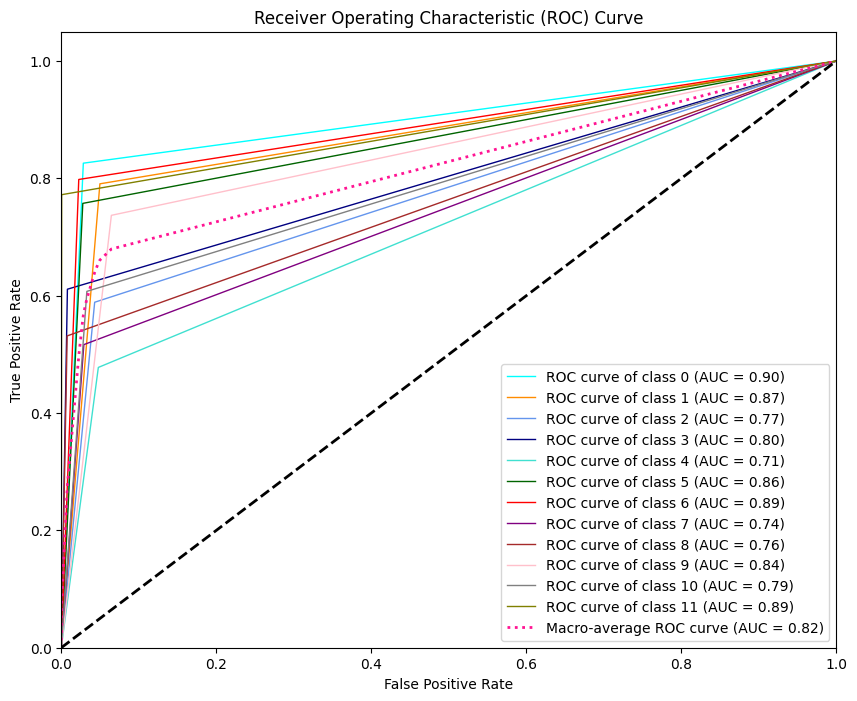

In [27]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

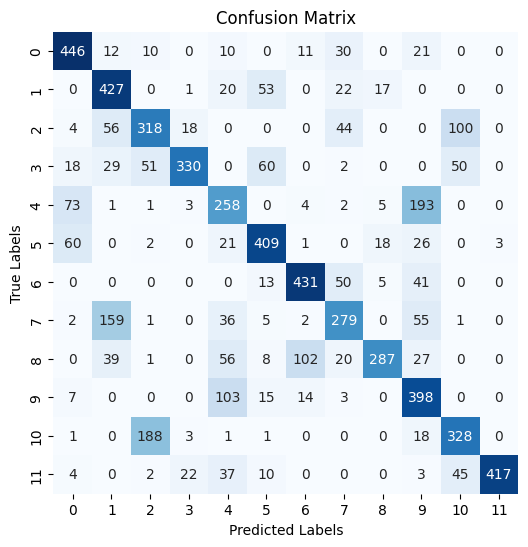

              precision    recall  f1-score   support

           0       0.73      0.83      0.77       540
           1       0.59      0.79      0.68       540
           2       0.55      0.59      0.57       540
           3       0.88      0.61      0.72       540
           4       0.48      0.48      0.48       540
           5       0.71      0.76      0.73       540
           6       0.76      0.80      0.78       540
           7       0.62      0.52      0.56       540
           8       0.86      0.53      0.66       540
           9       0.51      0.74      0.60       540
          10       0.63      0.61      0.62       540
          11       0.99      0.77      0.87       540

    accuracy                           0.67      6480
   macro avg       0.69      0.67      0.67      6480
weighted avg       0.69      0.67      0.67      6480



In [28]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

In [8]:
C_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/0'
D_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/1'
E_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/2'
G_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/3'
A_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/4'
Dm_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/5'
Em_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/6'
Am_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/7'
E_Barre_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/8'
A_Barre_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/9'
Em_Barre_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/10'
Am_Barre_folder = '/kaggle/input/img-chordclass-mask/Img_Mask/Img_Mask/11'
test_folder = '/kaggle/working/Mask/Img_Test'
train_folder = '/kaggle/working/Mask/Img_Train'

In [9]:
C_files = [(os.path.join(C_folder, file), 0) for file in os.listdir(C_folder) if file.endswith('.jpg')]
D_files = [(os.path.join(D_folder, file), 1) for file in os.listdir(D_folder) if file.endswith('.jpg')]
E_files = [(os.path.join(E_folder, file), 2) for file in os.listdir(E_folder) if file.endswith('.jpg')]
G_files = [(os.path.join(G_folder, file), 3) for file in os.listdir(G_folder) if file.endswith('.jpg')]
A_files = [(os.path.join(A_folder, file), 4) for file in os.listdir(A_folder) if file.endswith('.jpg')]
Dm_files = [(os.path.join(Dm_folder, file), 5) for file in os.listdir(Dm_folder) if file.endswith('.jpg')]
Em_files = [(os.path.join(Em_folder, file), 6) for file in os.listdir(Em_folder) if file.endswith('.jpg')]
Am_files = [(os.path.join(Am_folder, file), 7) for file in os.listdir(Am_folder) if file.endswith('.jpg')]
E_Barre_files = [(os.path.join(E_Barre_folder, file), 8) for file in os.listdir(E_Barre_folder) if file.endswith('.jpg')]
A_Barre_files = [(os.path.join(A_Barre_folder, file), 9) for file in os.listdir(A_Barre_folder) if file.endswith('.jpg')]
Em_Barre_files = [(os.path.join(Em_Barre_folder, file), 10) for file in os.listdir(Em_Barre_folder) if file.endswith('.jpg')]
Am_Barre_files = [(os.path.join(Am_Barre_folder, file), 11) for file in os.listdir(Am_Barre_folder) if file.endswith('.jpg')]
all_files = C_files + D_files + E_files + G_files + A_files + Dm_files + Em_files + Am_files + E_Barre_files + A_Barre_files + Em_Barre_files + Am_Barre_files

filenames = [file[0] for file in all_files]
labels = [file[1] for file in all_files]

X_train_filenames, X_test_filenames, y_train, y_test = train_test_split(filenames, labels, test_size=0.2, random_state=42)

os.makedirs(test_folder, exist_ok=True)
os.makedirs(train_folder, exist_ok=True)

In [10]:
for filename, label in zip(X_train_filenames, y_train):
    dst_folder = os.path.join(train_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)
    
for filename, label in zip(X_test_filenames, y_test):
    dst_folder = os.path.join(test_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)

In [13]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.ImageFolder(root=train_folder, transform=transform)
val_dataset = datasets.ImageFolder(root=test_folder, transform=transform)

batch_size = 32
NUM_WORKERS = int(os.cpu_count() / 2)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

In [14]:
model_mask = MyLitModel(lr=0.001)

checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='/kaggle/working/Model_mask/',
    filename='chord-mask-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3,
    mode='min',
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

os.environ["PL_PROGRESS_BAR_REFRESH_RATE"] = "10"
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    devices="auto",
    logger=TensorBoardLogger(save_dir="logs/"),
    callbacks=[checkpoint_callback, early_stop_callback],
)

In [15]:
trainer.fit(model_mask, train_loader, val_loader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [16]:
test_dataset = datasets.ImageFolder(root='/kaggle/input/img-chordclass-mask/Test_Img_Mask/Test_Img_Mask', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_model_path = checkpoint_callback.best_model_path
model = MyLitModel.load_from_checkpoint(best_model_path)
trainer = pl.Trainer()
test_results = trainer.test(model, dataloaders=test_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │     0.697376549243927     │
│      test_loss_epoch      │    2.6566643714904785     │
└───────────────────────────┴───────────────────────────┘

In [17]:
from tensorflow.keras.utils import to_categorical
test_preds = model.test_preds
test_labels = model.test_labels
test_preds_list = [int(item) for sublist in test_preds for item in sublist]
test_labels_list = [int(item) for sublist in test_labels for item in sublist]
y_test_encoded = to_categorical(test_labels_list, num_classes=12)
y_pred_classes = to_categorical(test_preds_list, num_classes=12)

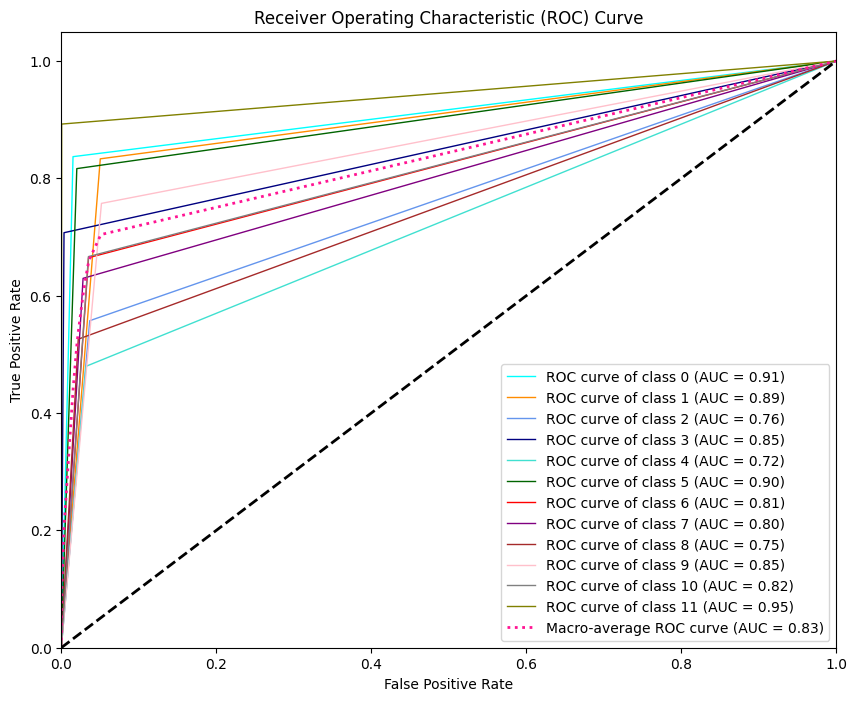

In [18]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

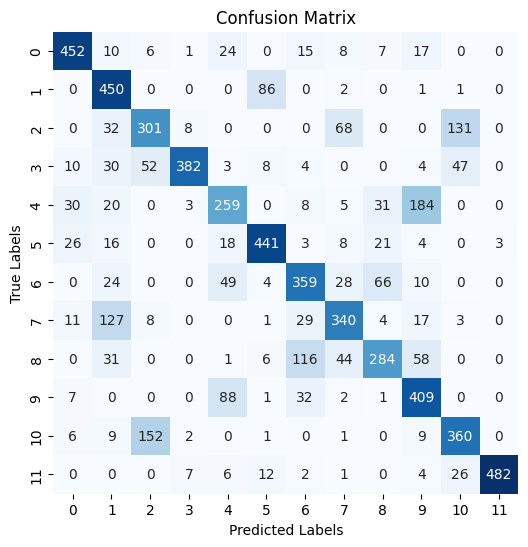

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       540
           1       0.60      0.83      0.70       540
           2       0.58      0.56      0.57       540
           3       0.95      0.71      0.81       540
           4       0.58      0.48      0.52       540
           5       0.79      0.82      0.80       540
           6       0.63      0.66      0.65       540
           7       0.67      0.63      0.65       540
           8       0.69      0.53      0.60       540
           9       0.57      0.76      0.65       540
          10       0.63      0.67      0.65       540
          11       0.99      0.89      0.94       540

    accuracy                           0.70      6480
   macro avg       0.71      0.70      0.70      6480
weighted avg       0.71      0.70      0.70      6480



In [19]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

In [20]:
best_model_path

'/kaggle/working/Model_mask/chord-mask-epoch=13-val_loss=0.01.ckpt'

In [21]:
from IPython.display import FileLink
FileLink(r'Model_mask/chord-mask-epoch=13-val_loss=0.01.ckpt')

/kaggle/working/Model_mask/chord-mask-epoch=13-val_loss=0.01.ckpt

In [9]:
C_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/0'
D_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/1'
E_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/2'
G_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/3'
A_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/4'
Dm_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/5'
Em_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/6'
Am_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/7'
E_Barre_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/8'
A_Barre_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/9'
Em_Barre_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/10'
Am_Barre_folder = '/kaggle/input/img-chordclass-no-sha/Img_no_sha/Img_no_sha/11'
test_folder = '/kaggle/working/chord/Img_Test'
train_folder = '/kaggle/working/chord/Img_Train'

In [10]:
C_files = [(os.path.join(C_folder, file), 0) for file in os.listdir(C_folder) if file.endswith('.jpg')]
D_files = [(os.path.join(D_folder, file), 1) for file in os.listdir(D_folder) if file.endswith('.jpg')]
E_files = [(os.path.join(E_folder, file), 2) for file in os.listdir(E_folder) if file.endswith('.jpg')]
G_files = [(os.path.join(G_folder, file), 3) for file in os.listdir(G_folder) if file.endswith('.jpg')]
A_files = [(os.path.join(A_folder, file), 4) for file in os.listdir(A_folder) if file.endswith('.jpg')]
Dm_files = [(os.path.join(Dm_folder, file), 5) for file in os.listdir(Dm_folder) if file.endswith('.jpg')]
Em_files = [(os.path.join(Em_folder, file), 6) for file in os.listdir(Em_folder) if file.endswith('.jpg')]
Am_files = [(os.path.join(Am_folder, file), 7) for file in os.listdir(Am_folder) if file.endswith('.jpg')]
E_Barre_files = [(os.path.join(E_Barre_folder, file), 8) for file in os.listdir(E_Barre_folder) if file.endswith('.jpg')]
A_Barre_files = [(os.path.join(A_Barre_folder, file), 9) for file in os.listdir(A_Barre_folder) if file.endswith('.jpg')]
Em_Barre_files = [(os.path.join(Em_Barre_folder, file), 10) for file in os.listdir(Em_Barre_folder) if file.endswith('.jpg')]
Am_Barre_files = [(os.path.join(Am_Barre_folder, file), 11) for file in os.listdir(Am_Barre_folder) if file.endswith('.jpg')]
all_files = C_files + D_files + E_files + G_files + A_files + Dm_files + Em_files + Am_files + E_Barre_files + A_Barre_files + Em_Barre_files + Am_Barre_files

filenames = [file[0] for file in all_files]
labels = [file[1] for file in all_files]

X_train_filenames, X_test_filenames, y_train, y_test = train_test_split(filenames, labels, test_size=0.2, random_state=42)

os.makedirs(test_folder, exist_ok=True)
os.makedirs(train_folder, exist_ok=True)

In [11]:
for filename, label in zip(X_train_filenames, y_train):
    dst_folder = os.path.join(train_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)
    
for filename, label in zip(X_test_filenames, y_test):
    dst_folder = os.path.join(test_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)

In [12]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.ImageFolder(root=train_folder, transform=transform)
val_dataset = datasets.ImageFolder(root=test_folder, transform=transform)

batch_size = 32
NUM_WORKERS = int(os.cpu_count() / 2)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

In [13]:
model_no_sha_mask = MyLitModel(lr=0.001)

checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='/kaggle/working/Model_no_sha/',
    filename='chord-nosha-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3,
    mode='min',
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

os.environ["PL_PROGRESS_BAR_REFRESH_RATE"] = "10"
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    devices="auto",
    logger=TensorBoardLogger(save_dir="logs/"),
    callbacks=[checkpoint_callback, early_stop_callback],
)

In [14]:
trainer.fit(model_no_sha_mask, train_loader, val_loader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [15]:
test_dataset = datasets.ImageFolder(root='/kaggle/input/img-chordclass-no-sha/Test_Img_no_sha/Test_Img_no_sha', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_model_path = checkpoint_callback.best_model_path
model = MyLitModel.load_from_checkpoint(best_model_path)
trainer = pl.Trainer()
test_results = trainer.test(model, dataloaders=test_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │    0.7046296000480652     │
│      test_loss_epoch      │    2.1711409091949463     │
└───────────────────────────┴───────────────────────────┘

In [16]:
best_model_path

'/kaggle/working/Model_no_sha/chord-nosha-epoch=08-val_loss=0.01.ckpt'

In [18]:
from IPython.display import FileLink
FileLink(r'Model_no_sha/chord-nosha-epoch=08-val_loss=0.01.ckpt')

/kaggle/working/Model_no_sha/chord-nosha-epoch=08-val_loss=0.01.ckpt

In [19]:
from tensorflow.keras.utils import to_categorical
test_preds = model.test_preds
test_labels = model.test_labels
test_preds_list = [int(item) for sublist in test_preds for item in sublist]
test_labels_list = [int(item) for sublist in test_labels for item in sublist]
y_test_encoded = to_categorical(test_labels_list, num_classes=12)
y_pred_classes = to_categorical(test_preds_list, num_classes=12)

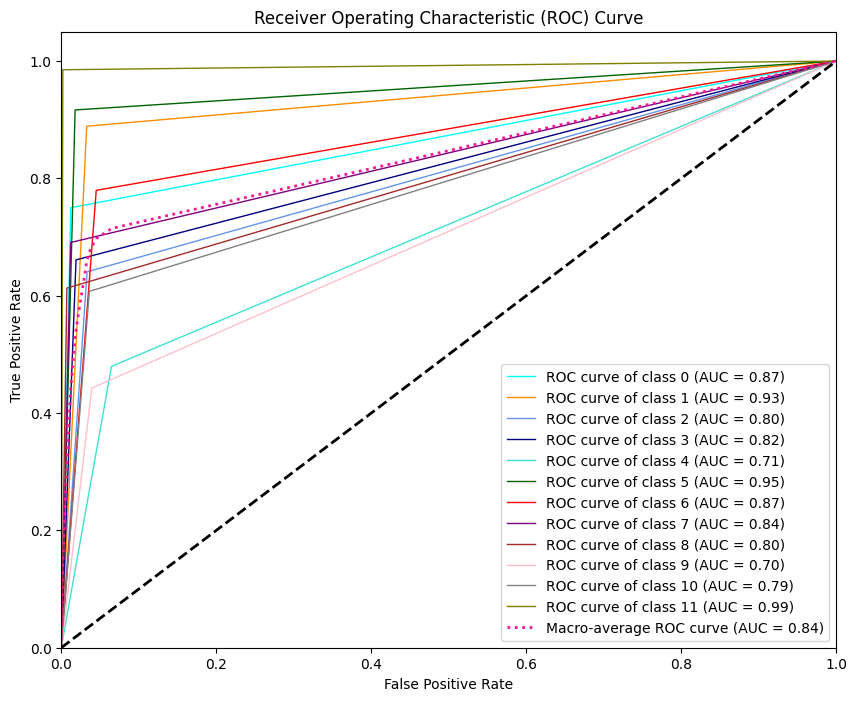

In [20]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

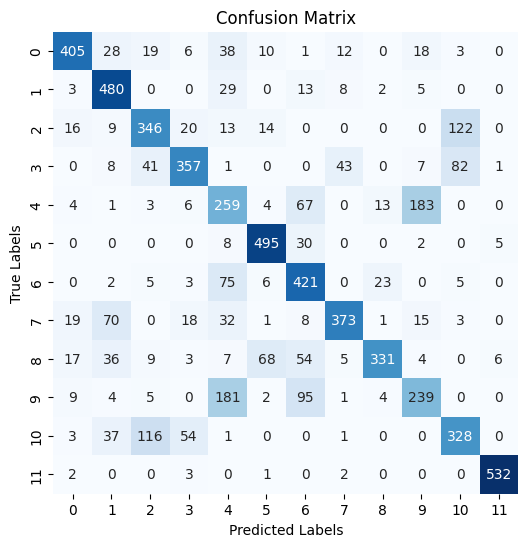

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       540
           1       0.71      0.89      0.79       540
           2       0.64      0.64      0.64       540
           3       0.76      0.66      0.71       540
           4       0.40      0.48      0.44       540
           5       0.82      0.92      0.87       540
           6       0.61      0.78      0.69       540
           7       0.84      0.69      0.76       540
           8       0.89      0.61      0.72       540
           9       0.51      0.44      0.47       540
          10       0.60      0.61      0.61       540
          11       0.98      0.99      0.98       540

    accuracy                           0.70      6480
   macro avg       0.72      0.70      0.71      6480
weighted avg       0.72      0.70      0.71      6480



In [21]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

In [9]:
C_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/0'
D_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/1'
E_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/2'
G_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/3'
A_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/4'
Dm_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/5'
Em_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/6'
Am_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/7'
E_Barre_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/8'
A_Barre_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/9'
Em_Barre_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/10'
Am_Barre_folder = '/kaggle/input/img-chordclass-yc/Img_Yc/Img_Yc/11'
test_folder = '/kaggle/working/yc/Img_Test'
train_folder = '/kaggle/working/yc/Img_Train'

In [10]:
C_files = [(os.path.join(C_folder, file), 0) for file in os.listdir(C_folder) if file.endswith('.jpg')]
D_files = [(os.path.join(D_folder, file), 1) for file in os.listdir(D_folder) if file.endswith('.jpg')]
E_files = [(os.path.join(E_folder, file), 2) for file in os.listdir(E_folder) if file.endswith('.jpg')]
G_files = [(os.path.join(G_folder, file), 3) for file in os.listdir(G_folder) if file.endswith('.jpg')]
A_files = [(os.path.join(A_folder, file), 4) for file in os.listdir(A_folder) if file.endswith('.jpg')]
Dm_files = [(os.path.join(Dm_folder, file), 5) for file in os.listdir(Dm_folder) if file.endswith('.jpg')]
Em_files = [(os.path.join(Em_folder, file), 6) for file in os.listdir(Em_folder) if file.endswith('.jpg')]
Am_files = [(os.path.join(Am_folder, file), 7) for file in os.listdir(Am_folder) if file.endswith('.jpg')]
E_Barre_files = [(os.path.join(E_Barre_folder, file), 8) for file in os.listdir(E_Barre_folder) if file.endswith('.jpg')]
A_Barre_files = [(os.path.join(A_Barre_folder, file), 9) for file in os.listdir(A_Barre_folder) if file.endswith('.jpg')]
Em_Barre_files = [(os.path.join(Em_Barre_folder, file), 10) for file in os.listdir(Em_Barre_folder) if file.endswith('.jpg')]
Am_Barre_files = [(os.path.join(Am_Barre_folder, file), 11) for file in os.listdir(Am_Barre_folder) if file.endswith('.jpg')]
all_files = C_files + D_files + E_files + G_files + A_files + Dm_files + Em_files + Am_files + E_Barre_files + A_Barre_files + Em_Barre_files + Am_Barre_files

filenames = [file[0] for file in all_files]
labels = [file[1] for file in all_files]

X_train_filenames, X_test_filenames, y_train, y_test = train_test_split(filenames, labels, test_size=0.2, random_state=42)

os.makedirs(test_folder, exist_ok=True)
os.makedirs(train_folder, exist_ok=True)

In [11]:
for filename, label in zip(X_train_filenames, y_train):
    dst_folder = os.path.join(train_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)
    
for filename, label in zip(X_test_filenames, y_test):
    dst_folder = os.path.join(test_folder, str(label))
    os.makedirs(dst_folder, exist_ok=True)
    shutil.copy(filename, dst_folder)

In [12]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.ImageFolder(root=train_folder, transform=transform)
val_dataset = datasets.ImageFolder(root=test_folder, transform=transform)

batch_size = 32
NUM_WORKERS = int(os.cpu_count() / 2)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=NUM_WORKERS)

In [13]:
model_yc = MyLitModel(lr=0.001)

checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='/kaggle/working/Model_yc/',
    filename='chord-yc-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3,
    mode='min',
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

os.environ["PL_PROGRESS_BAR_REFRESH_RATE"] = "10"
trainer = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    devices="auto",
    logger=TensorBoardLogger(save_dir="logs/"),
    callbacks=[checkpoint_callback, early_stop_callback],
)

In [14]:
trainer.fit(model_yc, train_loader, val_loader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [15]:
test_dataset = datasets.ImageFolder(root='/kaggle/input/img-chordclass-yc/Test_Img_Yc/Test_Img_Yc', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

best_model_path = checkpoint_callback.best_model_path
model = MyLitModel.load_from_checkpoint(best_model_path)
trainer = pl.Trainer()
test_results = trainer.test(model, dataloaders=test_loader)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │    0.6719135642051697     │
│      test_loss_epoch      │    2.5236740112304688     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
best_model_path

In [ ]:
from IPython.display import FileLink
FileLink(r'Model_yc/middle-yc-epoch=14-val_loss=0.01.ckpt')

In [16]:
from tensorflow.keras.utils import to_categorical
test_preds = model.test_preds
test_labels = model.test_labels
test_preds_list = [int(item) for sublist in test_preds for item in sublist]
test_labels_list = [int(item) for sublist in test_labels for item in sublist]
y_test_encoded = to_categorical(test_labels_list, num_classes=12)
y_pred_classes = to_categorical(test_preds_list, num_classes=12)

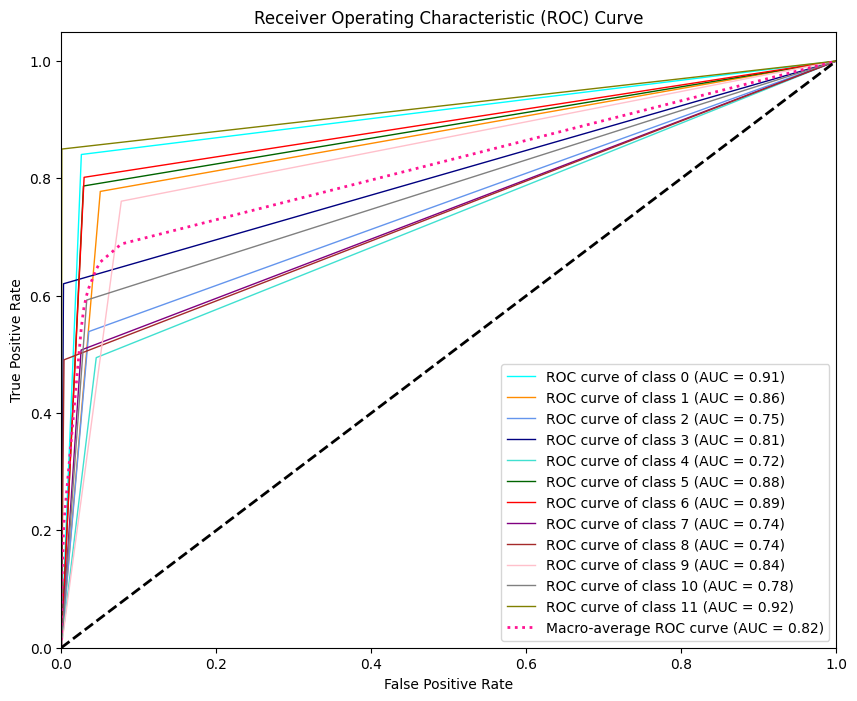

In [17]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

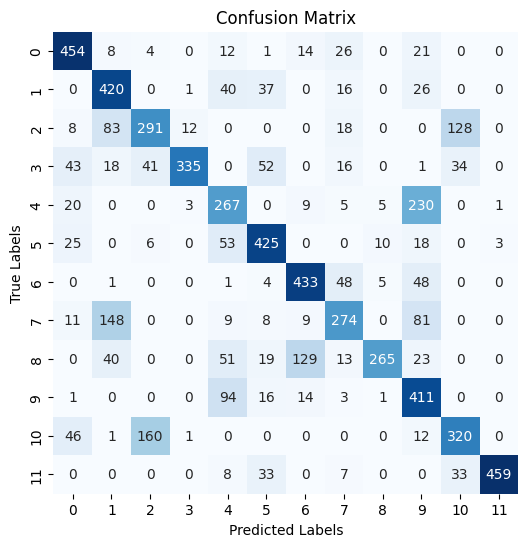

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       540
           1       0.58      0.78      0.67       540
           2       0.58      0.54      0.56       540
           3       0.95      0.62      0.75       540
           4       0.50      0.49      0.50       540
           5       0.71      0.79      0.75       540
           6       0.71      0.80      0.75       540
           7       0.64      0.51      0.57       540
           8       0.93      0.49      0.64       540
           9       0.47      0.76      0.58       540
          10       0.62      0.59      0.61       540
          11       0.99      0.85      0.92       540

    accuracy                           0.67      6480
   macro avg       0.70      0.67      0.67      6480
weighted avg       0.70      0.67      0.67      6480



In [18]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))

In [11]:
test_folder = '/kaggle/working/Mask/Img_Test'
train_folder = '/kaggle/working/Mask/Img_Train'

In [12]:
model_eva = timm.create_model('eva02_tiny_patch14_336.mim_in22k_ft_in1k', pretrained=True)
model_eva = model_eva.eval()

data_config = timm.data.resolve_model_data_config(model_eva)
train_transforms = timm.data.create_transform(**data_config, is_training=True)
val_transforms = timm.data.create_transform(**data_config, is_training=False)

train_dataset = datasets.ImageFolder(root=train_folder, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=test_folder, transform=val_transforms)

model.safetensors:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

In [13]:
batch_size = 32
NUM_WORKERS = int(os.cpu_count() / 2)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=3)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=3)

In [14]:
class LitEva02(pl.LightningModule):
    def __init__(self, num_classes=12, lr=0.001):
        super(LitEva02, self).__init__()
        self.model = timm.create_model('eva02_tiny_patch14_336.mim_in22k_ft_in1k', pretrained=True, num_classes=num_classes)
        self.train_accuracy = Accuracy(task="multiclass", num_classes=num_classes)
        self.val_accuracy = Accuracy(task="multiclass", num_classes=num_classes)
        self.test_accuracy = Accuracy(task="multiclass", num_classes=num_classes)
        self.lr = lr
        self.test_preds = []
        self.test_labels = []

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        preds = self(images)
        acc = self.train_accuracy(preds, labels)
        loss = nn.CrossEntropyLoss()(preds, labels)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        preds = self(images)
        acc = self.val_accuracy(preds, labels)
        loss = nn.CrossEntropyLoss()(preds, labels)
        self.log('val_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_acc', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def test_step(self, batch, batch_idx):
        images, labels = batch
        preds = self(images)
        acc = self.test_accuracy(preds, labels)
        loss = nn.CrossEntropyLoss()(preds, labels)
        self.log('test_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('test_acc', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.test_preds.append(torch.argmax(preds, dim=1).cpu().numpy())
        self.test_labels.append(labels.cpu().numpy())
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.lr, momentum=0.9)
        return optimizer

In [15]:
model_eva02_mask = LitEva02(lr=0.001)

checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='/kaggle/working/Model_mask_eva_up/',
    filename='chord-eva02-mask-cnn-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3,
    mode='min',
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

os.environ["PL_PROGRESS_BAR_REFRESH_RATE"] = "10"
trainer_Eva02 = pl.Trainer(
    max_epochs=15,
    accelerator="auto",
    devices="auto",
    logger=TensorBoardLogger(save_dir="logs/"),
    callbacks=[checkpoint_callback, early_stop_callback],
)

In [16]:
trainer_Eva02.fit(model_eva02_mask, train_loader, val_loader)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [17]:
test_dataset = datasets.ImageFolder(root='//kaggle/input/img-chordclass-mask/Test_Img_Mask/Test_Img_Mask', transform=val_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=3)

In [18]:
best_model_path = checkpoint_callback.best_model_path
model = LitEva02.load_from_checkpoint(best_model_path)
trainer = pl.Trainer()
test_results = trainer.test(model, dataloaders=test_loader)

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │    0.7953703999519348     │
│      test_loss_epoch      │    0.8663232922554016     │
└───────────────────────────┴───────────────────────────┘

In [19]:
best_model_path

'/kaggle/working/Model_mask_eva_up/chord-eva02-mask-cnn-epoch=12-val_loss=0.00.ckpt'

In [20]:
from IPython.display import FileLink
FileLink(r'Model_mask_eva_up/chord-eva02-mask-cnn-epoch=12-val_loss=0.00.ckpt')

/kaggle/working/Model_mask_eva_up/chord-eva02-mask-cnn-epoch=12-val_loss=0.00.ckpt

In [21]:
from tensorflow.keras.utils import to_categorical
test_preds = model.test_preds
test_labels = model.test_labels
test_preds_list = [int(item) for sublist in test_preds for item in sublist]
test_labels_list = [int(item) for sublist in test_labels for item in sublist]
y_test_encoded = to_categorical(test_labels_list, num_classes=12)
y_pred_classes = to_categorical(test_preds_list, num_classes=12)

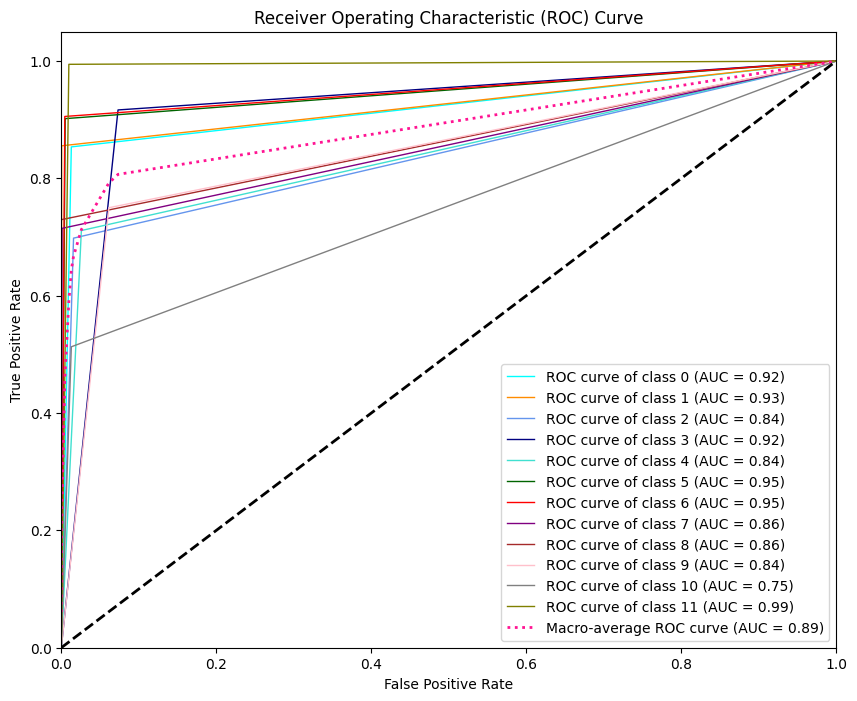

In [22]:
from itertools import cycle

roc_auc = {}
fpr = {}
tpr = {}

for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(y_test_encoded.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= y_test_encoded.shape[1]

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'turquoise', 'darkgreen', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(y_test_encoded.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=2,
         label='Macro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

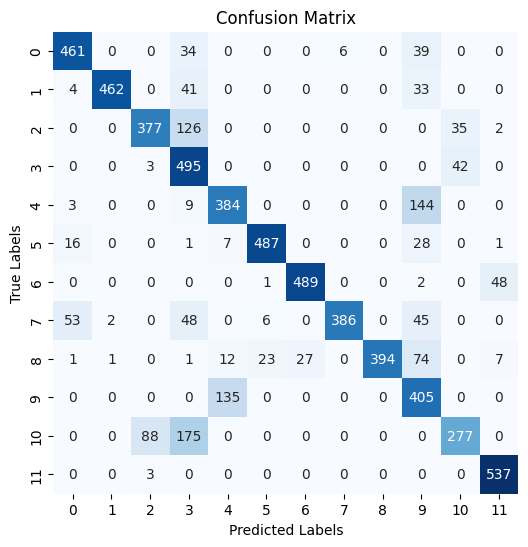

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       540
           1       0.99      0.86      0.92       540
           2       0.80      0.70      0.75       540
           3       0.53      0.92      0.67       540
           4       0.71      0.71      0.71       540
           5       0.94      0.90      0.92       540
           6       0.95      0.91      0.93       540
           7       0.98      0.71      0.83       540
           8       1.00      0.73      0.84       540
           9       0.53      0.75      0.62       540
          10       0.78      0.51      0.62       540
          11       0.90      0.99      0.95       540

    accuracy                           0.80      6480
   macro avg       0.83      0.80      0.80      6480
weighted avg       0.83      0.80      0.80      6480



In [23]:
y_predict_classes = np.argmax(y_pred_classes, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_predict_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true_classes, y_predict_classes))